In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:

IMAGE_SIZE = [224, 224]

train_path = r'../input/hair-diseases/Hair Diseases - Final/train'
test_path = r'../input/hair-diseases/Hair Diseases - Final/test'
val_path = r'../input/hair-diseases/Hair Diseases - Final/val'

# Define the CNN architecture


In [3]:
inputs = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# Create the model


In [4]:
model = Model(inputs=inputs, outputs=outputs)

# Compile the model


In [5]:

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=["acc"]
)

# Print model summary


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0     

# Data augmentation and loading

In [7]:


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)
test_set = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)
val_set = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


# Training the model


In [8]:
history = model.fit(
    training_set,
    validation_data=val_set,
    epochs=20,
    batch_size=128,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/20
150/150 [==============================] - 120s 745ms/step - loss: 1.6870 - acc: 0.4365 - val_loss: 1.0983 - val_acc: 0.6050
Epoch 2/20
150/150 [==============================] - 75s 497ms/step - loss: 0.6707 - acc: 0.7696 - val_loss: 0.4812 - val_acc: 0.8492
Epoch 3/20
150/150 [==============================] - 75s 500ms/step - loss: 0.2405 - acc: 0.9228 - val_loss: 0.2849 - val_acc: 0.9125
Epoch 4/20
150/150 [==============================] - 75s 499ms/step - loss: 0.1175 - acc: 0.9641 - val_loss: 0.3179 - val_acc: 0.9042
Epoch 5/20
150/150 [==============================] - 78s 522ms/step - loss: 0.0676 - acc: 0.9796 - val_loss: 0.2187 - val_acc: 0.9375
Epoch 6/20
150/150 [==============================] - 74s 493ms/step - loss: 0.0674 - acc: 0.9795 - val_loss: 0.2732 - val_acc: 0.9267
Epoch 7/20
150/150 [==============================] - 75s 497ms/step - loss: 0.0845 - acc: 0.9726 - val_loss: 0.3076 - val_acc: 0.9092
Epoch 8/20
150/150 [==============================] - 

# Save the model


In [9]:
model.save("raw_cnn_model.h5")

# Save training history


In [10]:
np.save('raw_cnn_history.npy', history.history)

# Evaluate the model on test set


In [11]:
eval_result = model.evaluate(test_set)
test_loss, test_acc = eval_result[0], eval_result[1]
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

19/19 [==============================] - 12s 631ms/step - loss: 0.1974 - acc: 0.9642
Test Accuracy: 96.42%
Test Loss: 0.1974


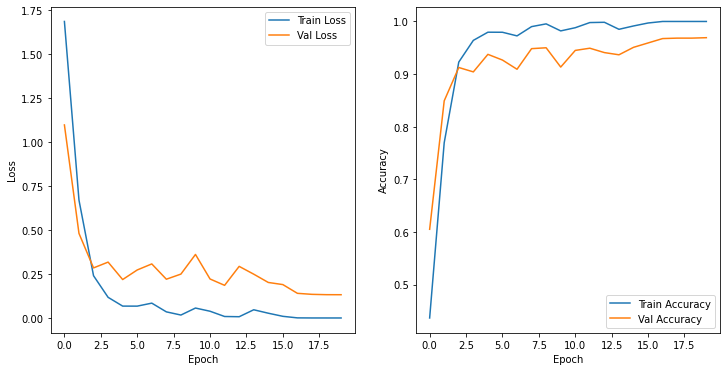

In [12]:
# Plotting Loss & Accuracy Graphs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 1200 images belonging to 10 classes.
Confusion Matrix:
[[118   0   0   0   0   0   1   0   1   0]
 [  0 117   0   1   0   1   0   1   0   0]
 [  0   0 119   0   0   0   0   0   1   0]
 [  0   0   0 119   0   0   1   0   0   0]
 [  0   0   0   2 111   1   1   1   1   3]
 [  2   0   0   0   0 118   0   0   0   0]
 [  0   0   0   0   0   0 118   0   1   1]
 [  0   1   0   1   0   0   1 116   0   1]
 [  0   0   0   0   1   0   1   0 114   4]
 [  1   0   1   1   0   2   2   4   2 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.99      0.97      0.98       120
           2       0.99      0.99      0.99       120
           3       0.96      0.99      0.98       120
           4       0.99      0.93      0.96       120
           5       0.97      0.98      0.98       120
           6       0.94      0.98      0.96       120
           7       0.95      0.97      0.96       12

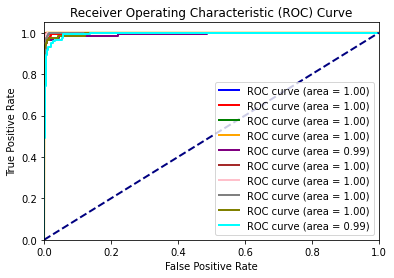

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score

model = tf.keras.models.load_model("raw_cnn_model.h5")
history = np.load('raw_cnn_history.npy', allow_pickle='TRUE').item()


test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


y_true = test_set.classes
y_pred_probs = model.predict(test_set)

# If binary classification, use the first column of predictions
if y_pred_probs.shape[1] == 1:
    y_pred = (y_pred_probs > 0.5).astype(int)
    y_pred_probs = y_pred_probs.flatten()

    # Compute precision-recall curve and average precision
    precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
    average_precision = average_precision_score(y_true, y_pred_probs)

    # Plot precision-recall curve
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

else:  
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    
    num_classes = len(np.unique(y_true))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


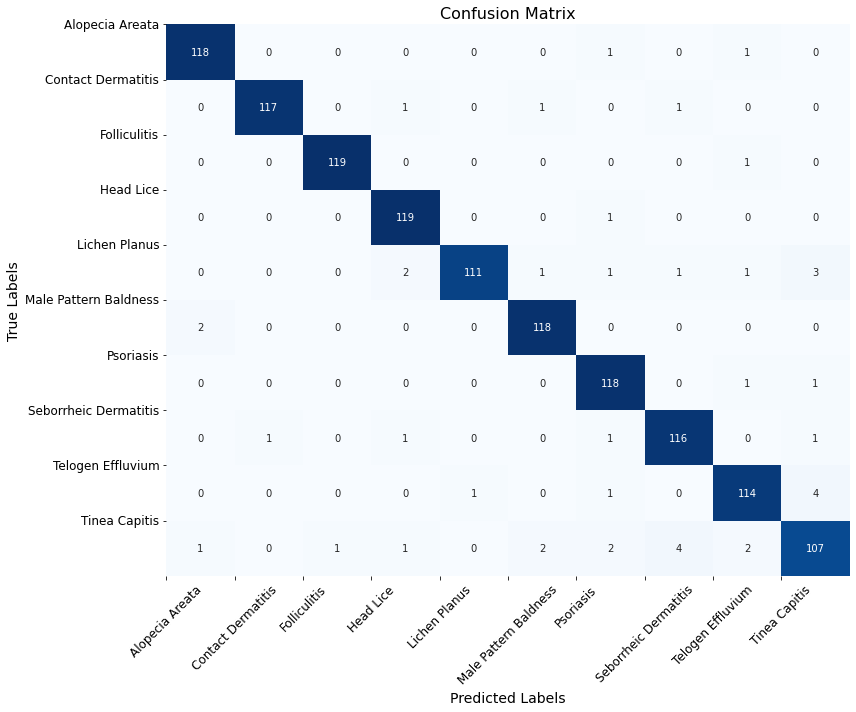

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(ticks=np.arange(len(test_set.class_indices)), labels=test_set.class_indices.keys(), fontsize=12, rotation=45)
plt.yticks(ticks=np.arange(len(test_set.class_indices)), labels=test_set.class_indices.keys(), fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

